In [1]:
function updateSIR(popvector)
    susceptibles = popvector[1]
    infected = popvector[2]
    removed = popvector[3]
    newS = susceptibles - lambda*susceptibles*infected*dt
    newI = infected + lambda*susceptibles*infected*dt - gam*infected*dt
    newR = removed + gam*infected*dt
    return [newS newI newR]
end

updateSIR (generic function with 1 method)

In [26]:
dt = 0.5
lambda = 1/20000
gam = 1/20
s,i,r = 2000.,10.,200.
vec = [s i r]
updateSIR(vec)

1×3 Array{Float64,2}:
 1999.5  10.25  200.25

In [36]:
# Se inicializan los datos

dt = 0.5
gam = 1/20.0
s,i,r = 22000000,4.,0.
lambda = gam/(0.1*s)

# Se empieza a poner valores a los pasos y vectores de resultados
tfinal = 610
nsteps = round(Int64,tfinal/dt)
resultvals = Array{Float64}(nsteps+1,3)
resultvals[1,:] = [s i r]
timevec = Array{Float64}(nsteps+1)
timevec[1] = 0.

for step in 1:nsteps
    resultvals[step+1,:] = updateSIR(resultvals[step,:])
    timevec[step+1] = timevec[step] + dt
end 


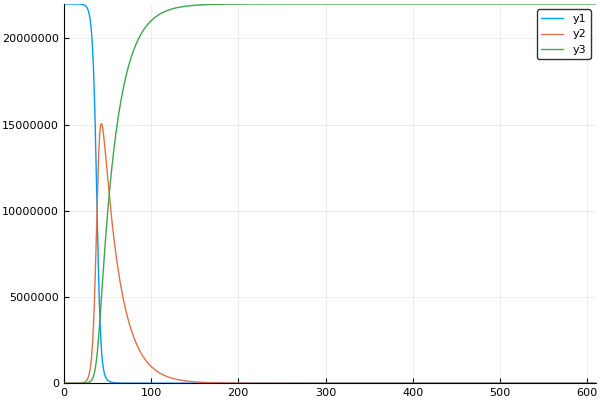

In [37]:
using Plots
pyplot()
plot(timevec,resultvals)


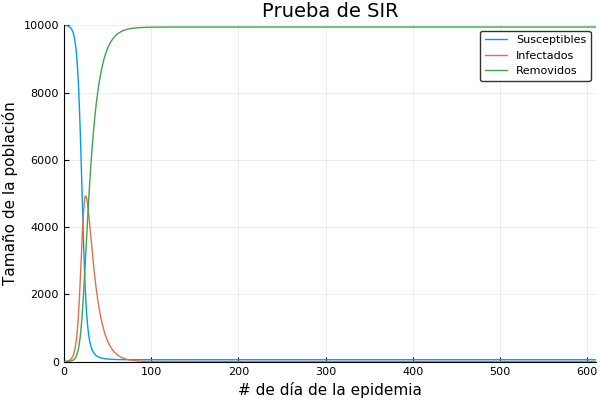

In [25]:
plot(timevec,resultvals,
    title = "Prueba de SIR",
    xlabel = "# de día de la epidemia",
    label = ["Susceptibles" "Infectados" "Removidos"],
    ylabel = "Tamaño de la población"
)